# MachineHack - Used Electronics Price Prediction: Weekend Hackathon #7

## Solution - Rishi Raj Gupta (LeaderBoard - 10th rank)

We live in a world that is driven by technology and electronic devices as gadgets have become a part of our daily life. It is near impossible to think of a world without smartphones or tablets. Like many kinds of goods or products, used electronic devices have a good demand in our country. In this hackathon, we challenge the data science community to predict the price of used electronic devices based on certain factors.

Given are 6 distinguishing factors that can influence the price of a used device. Your objective as a data scientist is to build a machine learning model that can predict the price of used electronic devices based on the given factors.
Data Description:-

The unzipped folder will have the following files.

    Train.csv –  2326 observations.
    Test.csv –  997 observations.
    Sample Submission – Sample format for the submission.

Target Variable: Price

In [1]:
# Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, string, warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


warnings.filterwarnings(action = 'ignore')
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_excel('Sample_Submission.xlsx')

In [2]:
train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499


In [3]:
test.head()

,Brand,Model_Info,Additional_Description,Locality,City,State
0,1,name0 55s66s66s778xxsxsmax etc,good condition 11months old single scratch we...,570,11,4
1,1,slightly used excellent condition name0 5 sale,101008700 1010030600 1010034300 10100192200 1...,762,8,2
2,1,name0 sx ios12 top letast model bill call,1010017300 delivery,60,13,5
3,1,name87 name0 x 64gb going lowest 41900,phone 1010023400 64 gb excellent condition sale,640,15,5
4,1,name0 5s proper condition one handedly used,full kit available 10100248300 condition 4gb ...,816,2,6


In [4]:
train.describe(include = ['O','F','int64'])

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
count,2326.000000,2326,2326,2326.000000,2326.000000,2326.000000,2326.000000
unique,NaN,2037,2094,NaN,NaN,NaN,NaN
top,NaN,name0 7 32gb,description,NaN,NaN,NaN,NaN
freq,NaN,12,102,NaN,NaN,NaN,NaN
mean,1.047291,NaN,NaN,538.894239,7.294067,3.693465,25562.137145
std,0.396109,NaN,NaN,333.355186,5.408113,2.194072,21316.854497
min,0.000000,NaN,NaN,0.000000,0.000000,0.000000,399.000000
25%,1.000000,NaN,NaN,249.000000,2.000000,2.000000,12000.000000
50%,1.000000,NaN,NaN,534.000000,8.000000,4.000000,18945.000000
75%,1.000000,NaN,NaN,814.000000,11.000000,5.000000,30974.250000


In [5]:
test.describe(include = ['O','F','int64'])

,Brand,Model_Info,Additional_Description,Locality,City,State
count,997.000000,997,997,997.000000,997.000000,997.000000
unique,NaN,918,913,NaN,NaN,NaN
top,NaN,name0 7 32 gb,description,NaN,NaN,NaN
freq,NaN,6,37,NaN,NaN,NaN
mean,1.038114,NaN,NaN,560.156469,7.792377,3.754263
std,0.393919,NaN,NaN,331.358688,5.263539,2.171094
min,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,1.000000,NaN,NaN,290.000000,2.000000,2.000000
50%,1.000000,NaN,NaN,547.000000,8.000000,4.000000
75%,1.000000,NaN,NaN,831.000000,13.000000,5.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   2326 non-null   int64 
 1   Model_Info              2326 non-null   object
 2   Additional_Description  2326 non-null   object
 3   Locality                2326 non-null   int64 
 4   City                    2326 non-null   int64 
 5   State                   2326 non-null   int64 
 6   Price                   2326 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 127.3+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   997 non-null    int64 
 1   Model_Info              997 non-null    object
 2   Additional_Description  997 non-null    object
 3   Locality                997 non-null    int64 
 4   City                    997 non-null    int64 
 5   State                   997 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 46.9+ KB


# Price Adjustment

As price is positively skewed. Therefore applying log transformation and using stats to clear outliers

1.7203759060497708 3.014479296272143


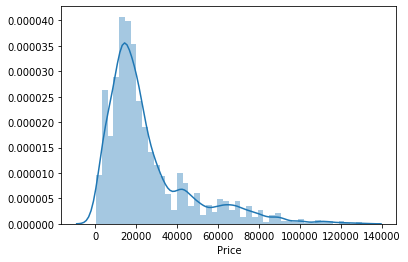

In [8]:
print((train.Price).skew(),(train.Price).kurt())
sns.distplot((train.Price))

-0.4337757208441427 0.8136157779119499


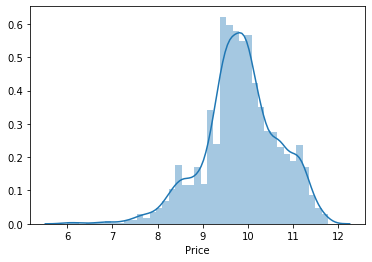

In [9]:
# After transformation

print(np.log1p(train.Price).skew(), np.log1p(train.Price).kurt())
sns.distplot(np.log(train.Price))

In [10]:
train.Price = np.log1p(train.Price)

In [11]:
# Removing Outliers 

q1 = train.Price.quantile(0.25)
q3 = train.Price.quantile(0.75)
iqr = q3 - q1
upper = q3+2*iqr
lower = q1-2*iqr
print(np.where(train.Price > upper))
print(np.where(train.Price < lower))

(array([], dtype=int64),)
(array([ 184,  382,  465,  522,  543,  552,  920, 1206, 1453, 1528, 1700,
       1708, 1721, 1753, 1754, 1864, 2185, 2190, 2201, 2275], dtype=int64),)


In [12]:
ind = []
ind.extend(list(np.where(train.Price < lower)[0]))
train.drop(index = ind, inplace = True)
train.reset_index(drop = True, inplace = True)

In [13]:
# Added flag to indicate train and test data
train['is_test'] = 0
test['is_test'] = 1

# Duplicacy

On analysis found that Model_Info columns contains duplicate comments and those duplicate entries have almost same price irrespective of other features. Therefore combined train and test dataframes and then based on duplicate entries filled values in test data set 

In [14]:
test_dup = set()
temp = test[test.Model_Info.duplicated()]
temp.reset_index(inplace = True)

test_dup.update(test[test.Model_Info.duplicated()].index)
test.drop(index = test_dup, inplace = True)

df = pd.concat([test,train], axis = 0)
df.reset_index(inplace = True)

temp2 = df[df.Model_Info.duplicated(keep = False)].sort_values(by = ['Model_Info', 'Price'])
null_ind = temp2[temp2.Price.isna()].index
val = temp2.Price.fillna(method = 'Ffill')

df.loc[null_ind,'Price'] = val[null_ind].values

In [15]:
train = df[df.is_test==0]
test = df[df.is_test==1]

train.reset_index(inplace = True, drop = True)
test = pd.concat([test,temp], axis = 0)
test = test.set_index('index').sort_index()
temp = test[test.Model_Info.duplicated(keep = False)].groupby('Model_Info').Price.fillna(method = 'Ffill')

test.loc[temp.index,'Price'] = temp.loc[temp.index].values

In [16]:
# Remaining test price which we need to find are : 
test.Price.isna().sum()

802

In [17]:
# dup_ans will contain price values for test set which  have duplicate entries for Model_info in train set
dup_ans = test[test.Price.notnull()].Price
test.drop(index = dup_ans.index, inplace = True)

In [18]:
# Combining both 
df = train.append(test, sort = False)

# Analysis of each feature

In [19]:
df.Brand = df.Brand.astype('category')

In [20]:
df.Model_Info = df.Model_Info.str.lower()

In [21]:
# converting numbers in string to numeric
to_num = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5 ,
          'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten': 10, 'eleven': 11, 'twelve':12 }

for k in to_num.keys():
    df.Model_Info = df.Model_Info.apply(lambda x: re.sub(f' {k} ',f' {to_num[k]} ', x))

In [22]:
# Determining year used

def day(x):
    d = re.search(r'([\d+])\s?day',x)
    if d is not None :
        return(int(d.group(1))/360)
    d = re.search(r'([\d+])\s?month',x)
    if d is not None :
        return(int(d.group(1))/12)
    d = re.search(r'([\d+])\s?year',x)
    if d is not None :
        return(int(d.group(1)))
    
df['day_Used'] = df.Model_Info.apply(lambda x: day(x))
df.day_Used.fillna(-999, inplace = True)

In [23]:
# Ram and Storage for a model 

df['ram'] = df.Model_Info.str.extract(r'[^\d](1|2|3|4|5|6|8)\s?gb')[0]
df.ram = df.ram.astype('float')
df.ram.fillna(-999, inplace = True)
df.ram = le.fit_transform(df.ram)

df['storage'] = df.Model_Info.str.extract(r'(16|32|64|128|256|512)\s?gb')[0]
df.storage = df.storage.astype('float')
df.storage.fillna(-999, inplace = True)
df.storage = le.fit_transform(df.storage)

In [24]:
# Determine whether mobile is of special version & Also check whehter it's a watch or not
df['is_special'] = df.Model_Info.str.contains(r'(note|pro|plus|max|x\s?e|x\s?s)')
df['is_watch'] = df.Model_Info.str.contains(r'(watch)')

df.is_special.fillna(False, inplace = True)
df.is_watch.fillna(False, inplace = True)

In [25]:
# Converting most occuring encoded name into their brand

df.Model_Info = df.Model_Info.apply(lambda x: re.sub('name0','iphone', x))
df.Model_Info = df.Model_Info.apply(lambda x: re.sub('name87','apple_iphone', x))
df.Model_Info = df.Model_Info.apply(lambda x: re.sub('name123','iphone', x))

df.Model_Info = df.Model_Info.apply(lambda x: re.sub('name615','huawei', x))
df.Model_Info = df.Model_Info.apply(lambda x: re.sub('name271','lenovo', x))
df.Model_Info = df.Model_Info.apply(lambda x: re.sub('name233','honor', x))
df.Model_Info = df.Model_Info.apply(lambda x: re.sub('name229','max', x))

In [26]:
# Extracting all iphone model
df['iphone_model'] = df.Model_Info.str.extract(r'phone\s?(3|4\s?s?|5\s?c?s?|6\s?s?\s?p?|7\s?p?|8\s?p?|x\s?r?s?|11\s?p?\s?m?|10|watch\s?\d?)')[0]
df.iphone_model.replace({'7 ':'7', '7 p':'7p', '8 p':'8p','6s p':'6sp', '5 s':'5s', 'watch ':'watch 3', '10':'x',
                         'x ':'x', 'x s':'xs','6 p':'6p', '5 ':'5', '8 ':'8', '11 p':'11p', '5 c':'5c',
                         '6 ':'6','6 s':'6s', '6 sp':'6sp','6s ':'6s'}, inplace = True)
df.iphone_model.fillna('Not_iphone', inplace = True)
df.iphone_model = df.iphone_model.astype('category')

In [27]:
# Extracting iphone model like (3,4,5,6,7,8,x,11) irrespective of their upgraded version like (plus, xe, xs, s, c, pro, max)
df['model_ver'] = df.iphone_model.apply(lambda x: x[0])

In [28]:
# Extracting phone brand

df['phone_brand'] = df.Model_Info.str.extract(r'(lenovo|hono|lg|huawei|phone)\s?[3|4\s?s?|5\s*c?s?|6\s?s?\s?plus|7\s?p?|8\s?p?|xr?s?|11\s?p|se]')[0]
df.phone_brand.fillna('not_known', inplace = True)
df.phone_brand = df.phone_brand.astype('category')

In [29]:
# Applying CountVec on both Model_Info as well as Additional_Description

tfidf = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features=200, lowercase=True)
sparse_model = pd.DataFrame(tfidf.fit_transform(df.Model_Info.values).todense(), index = df.index, columns = [a for a in range(200)])
sparse_additional = pd.DataFrame(tfidf.fit_transform(df.Additional_Description.values).todense(), index = df.index, columns = [a for a in range(200,400)])
df = pd.concat([df, sparse_model, sparse_additional], axis = 1)

In [30]:
del df['Model_Info']
del df['Additional_Description']
del df['index']
del df['is_test']

train = df[df.Price.notnull()]
train.reset_index(drop = True, inplace = True)

test = df[df.Price.isnull()]
train_label = train.Price
del train['Price']
del test['Price']

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [31]:
train.shape, test.shape

((2306, 445), (802, 445))

# Model

In [32]:
def folds(train, label, model, xg_boost = None, param = None, testset = None, seed = 123, split = 3):
    predicted = pd.DataFrame(np.zeros(len(label)))
    predicted.columns = ['Answer']
    
    predicted_test = pd.DataFrame(np.zeros(shape = (len(testset),split)), index = test.index)
    predicted_test.columns = [i for i in range(split)]
    
    rmse = []
    r2 = []
    
    kfold = KFold(n_splits=split, shuffle=True, random_state= seed)
    for i, (t_ind, v_ind) in enumerate(kfold.split(train.values)):
        xtrain , ytrain = train.loc[t_ind,:], label[t_ind]
        xval , yval = train.loc[v_ind,:], label[v_ind]
        
        training = xgb.DMatrix(xtrain, ytrain)
        testing = xgb.DMatrix(xval, yval)
        model = xgb.train(param , training, evals = [(training, 'training'),(testing, 'testing')],
                         num_boost_round = 400, early_stopping_rounds = 50, verbose_eval = 5)
        predicted.loc[v_ind,'Answer'] = model.predict(testing, ntree_limit= model.best_ntree_limit)
        predicted_test.loc[:,i] = model.predict(xgb.DMatrix(testset), ntree_limit= model.best_ntree_limit)
            
        print("RMSLE : ", (mean_squared_error(model.predict(testing, ntree_limit= model.best_ntree_limit), yval))**(1/2))
        rmse.append((mean_squared_error(model.predict(testing, ntree_limit= model.best_ntree_limit), yval))**(1/2))

    print('Mean RMSLE Error is : %s ' %(np.mean(np.array(rmse))))
    return(predicted , predicted_test)

In [33]:
param = dict()
param['objective'] = 'reg:linear'
param['metric'] = 'rmse'
param['learning_rate'] = 0.02
param['colsample_bytree'] = 0.4 
param['max_depth'] = 10
param['reg_lambda'] = 2
param['subsample'] = 0.8
param['random_state']  = 456
param['n_jobs'] = -1

xg_train, xg_test = folds(train, train_label, xgb, xg_boost = True, param = param, testset = test, seed = 34335, split=3)

[17:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	training-rmse:9.19359	testing-rmse:9.22242
Multiple eval metrics have been passed: 'testing-rmse' will be used for early stopping.

Will train until testing-rmse hasn't improved in 50 rounds.
[5]	training-rmse:8.31784	testing-rmse:8.34531
[10]	training-rmse:7.52729	testing-rmse:7.55301
[15]	training-rmse:6.81191	testing-rmse:6.83691
[20]	training-rmse:6.16624	testing-rmse:6.18918
[25]	training-rmse:5.58244	testing-rmse:5.60401
[30]	training-rmse:5.05447	testing-rmse:5.07549
[35]	training-rmse:4.57831	testing-rmse:4.59866
[40]	training-rmse:4.14761	testing-rmse:4.16703
[45]	training-rmse:3.75894	testing-rmse:3.77716
[50]	training-rmse:3.40723	testing-rmse:3.42483
[55]	training-rmse:3.08982	testing-rmse:3.10687
[60]	training-rmse:2.80286	testing-rmse:2.81893
[65]	training-rmse:2.54427	testing-rmse:2.55911
[70]	training-rmse:2.31034	testing-rmse:2.32461
[75]	training-rms

[360]	training-rmse:0.209777	testing-rmse:0.368629
[365]	training-rmse:0.207691	testing-rmse:0.368417
[370]	training-rmse:0.205114	testing-rmse:0.368202
[375]	training-rmse:0.202543	testing-rmse:0.368224
[380]	training-rmse:0.200677	testing-rmse:0.368379
[385]	training-rmse:0.198605	testing-rmse:0.368476
[390]	training-rmse:0.196479	testing-rmse:0.368507
[395]	training-rmse:0.195152	testing-rmse:0.368274
[399]	training-rmse:0.193308	testing-rmse:0.368038
RMSLE :  0.3680384161693006
[17:08:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	training-rmse:9.21096	testing-rmse:9.18627
Multiple eval metrics have been passed: 'testing-rmse' will be used for early stopping.

Will train until testing-rmse hasn't improved in 50 rounds.
[5]	training-rmse:8.33419	testing-rmse:8.31005
[10]	training-rmse:7.54044	testing-rmse:7.51681
[15]	training-rmse:6.82386	testing-rmse:6.80019
[20]	training-rmse:6.17684	testing-rmse:6.15306
[25]	train

In [34]:
temp = np.mean(xg_test, axis = 1)
temp = pd.concat([temp, dup_ans], axis = 0).sort_index()

In [35]:
sample.Price = np.exp(temp)-1

In [36]:
sample.to_excel('XGB_2STD.xlsx', index = False)

In [37]:
sample.Price

0      11085.508437
1       8110.279434
2      13582.849760
3      44365.888614
4       8418.857625
           ...     
992    19784.280272
993    19036.337242
994    12296.478788
995    12027.634330
996    25143.532200
Name: Price, Length: 997, dtype: float64